In [1]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential,load_model
from keras.layers import LSTM, Dense,Dropout,Bidirectional
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
tf.get_logger().setLevel('ERROR')

In [2]:
df = pd.read_csv('../dataset/global_dataset.csv') 
df.drop(columns=['TaskID','VmID'], inplace=True)  # Features

X = df.drop('DataCenterID', axis=1)  # Features
y = df['DataCenterID']-3  # Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
unique_labels = np.unique(y_train.values)
print(unique_labels)
print(df.info())
num_classes = len(unique_labels)
print(" xtrain ", X_train.shape, "\n", "ytrain ", y_train.shape, "\n", "xtest  ", X_test.shape, "\n", "ytest ", y_test.shape, "\n")

[0 1 2]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TaskFileSize        2000 non-null   int64  
 1   TaskOutputFileSize  2000 non-null   int64  
 2   TaskFileLength      2000 non-null   int64  
 3   CpuTime             2000 non-null   float64
 4   TotalLength         2000 non-null   int64  
 5   UserLatitude        2000 non-null   float64
 6   UserLongitude       2000 non-null   float64
 7   DataCenterID        2000 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 125.1 KB
None
 xtrain  (1600, 7) 
 ytrain  (1600,) 
 xtest   (400, 7) 
 ytest  (400,) 



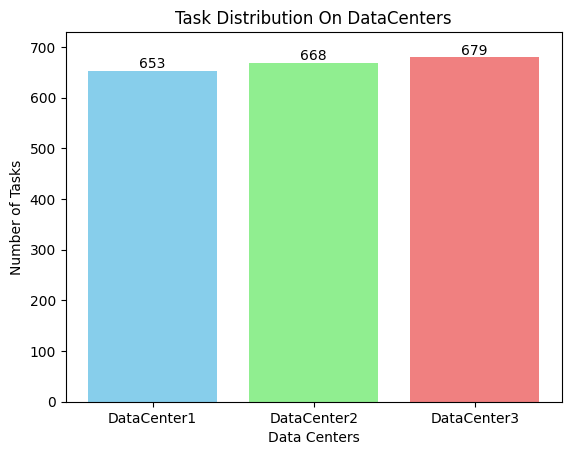

In [3]:

data_center_labels = ['DataCenter1', 'DataCenter2', 'DataCenter3']
tasks_per_data_center = df['DataCenterID'].value_counts().sort_index()

# Assigning colors
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(data_center_labels, tasks_per_data_center, color=colors)

# Displaying the task counts on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Adjusting plot properties
plt.title('Task Distribution On DataCenters')
plt.xlabel('Data Centers')
plt.ylabel('Number of Tasks')
plt.ylim(0, max(tasks_per_data_center) + 50)  # Adjust y-axis limit for better visibility
plt.show()


In [4]:


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Ensabmle Model  Accuracy: ",np.round(accuracy* 100) ,'%')


Ensabmle Model  Accuracy:  84.0 %


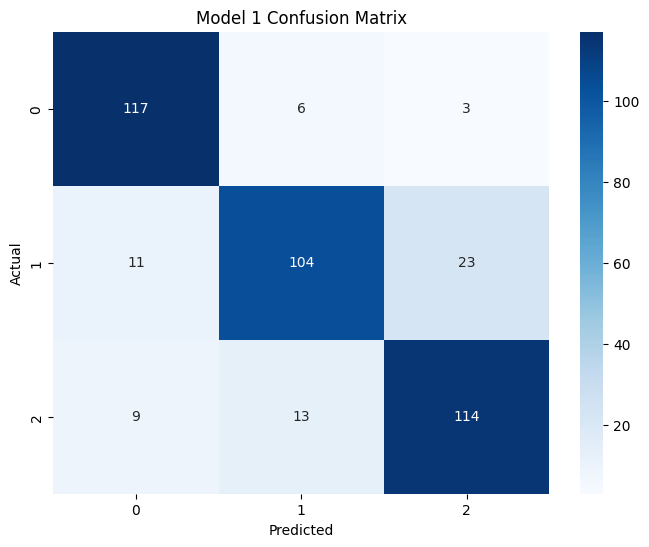

In [38]:
# confusing matrix

y_pred = model.predict(X_test)
# Create a confusion matrix
model_cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(model_cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Model 1 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [6]:
from joblib import dump

dump(model, '../models/ensemble_model_84.joblib')
# 

['../models/ensemble_model_84.joblib']